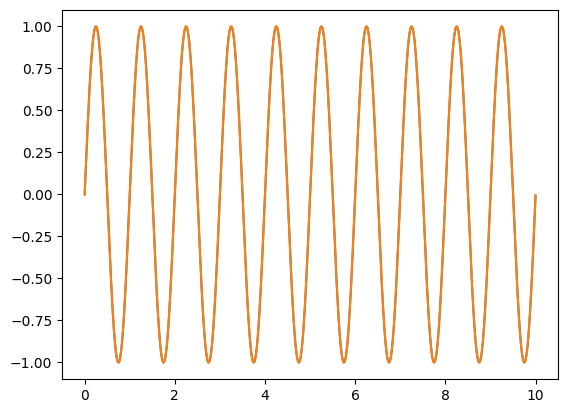

In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
t = np.arange(0, 10, 1/1000)
x = np.sin(2 * np.pi * 1 * t)

plt.plot(t, x)
plt.show()

In [2]:
import os
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft

# Reading excel files from current directory
directory_path = os.path.dirname(os.path.abspath(' '))

file_list = os.listdir(directory_path)

excel_file_list = [file for file in file_list if file.endswith('.csv')]

excel_file_keys = []

for excel_file in excel_file_list:
    first_index = excel_file.find('_')
    second_index = excel_file.find('_', first_index + 1)

    excel_file_keys.append(excel_file[first_index + 1 : second_index])
# print(excel_file_keys)

excel_file_data = []

for excel_file in excel_file_list:
    file_path = os.path.join(directory_path, excel_file)
    # print(file_path)
    data_values = pd.read_csv(file_path)
    excel_file_data.append(data_values.iloc[:,1].values)

min_samples = len(excel_file_data[0])
for file in excel_file_data:
    min_samples = min(len(file), min_samples)

excel_file_data = [file[:min_samples] for file in excel_file_data]

# Storing excel file sample data and using excel file name as key for dictionary
leak_samples = dict(zip(excel_file_keys, excel_file_data))

file_path = os.path.join(directory_path, excel_file_list[0])
data = pd.read_csv(file_path)
time_samples = data.iloc[:,0].values
time_samples = time_samples[:min_samples]

# pprint.pprint(leak_samples)

# FFT analsis of samples 
fft_analysed_samples = dict()
for key, value in leak_samples.items():
    fft_analysed_samples[key] = fft(value)

# Creating frequency axis sampling points
number_of_samples = 10000
N = number_of_samples
n = np.arange(N)

sampling_interval = time_samples[1]
T = N * sampling_interval

freq = n / T
freq_max_limit = np.median(freq)
print(len(freq))

10000


In [3]:

# Defining the number of samples between each fft analysis
spacing = int(number_of_samples / 10)
fft_data = dict()
for key, value in leak_samples.items():
    
    fft_segments = []
    max_samples = int(len(value) / spacing)
    for i in range(0, max_samples):
        segment = fft(value[(i * spacing) : (i * spacing + number_of_samples)])
        fft_segments.append(segment)
    
    fft_data[key] = pd.DataFrame(fft_segments, columns = freq)
    print(type(fft_data[key]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


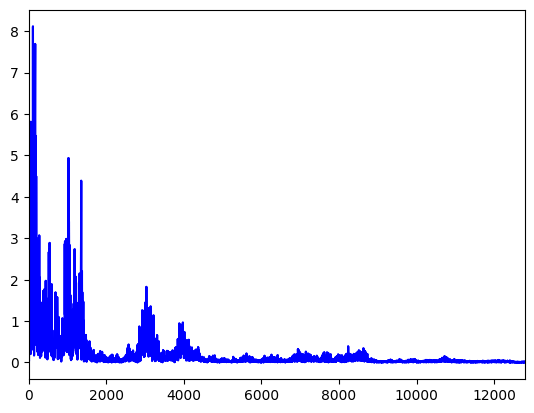

In [9]:
# pprint.pprint(fft_data[excel_file_keys[0]].head())
%matplotlib widget
firstPlot = fft_data[excel_file_keys[0]].iloc[0]
plt.plot(freq, abs(firstPlot), '-b')
plt.xlim([0, freq_max_limit])
plt.show()